In [2]:
def read_file(file_name): 
    data_list  = []
    with open(file_name, 'r') as f: 
        for line in f: 
            line = line.strip() 
            label = ' '.join(line[1:line.find("]")].strip().split())
            text = line[line.find("]")+1:].strip()
            data_list.append([label, text])
    return data_list 


In [3]:
# dataset rkhna hai
file_name = "psychExp.txt"
psychExp_txt = read_file(file_name)


In [4]:
print("The number of instances: {}".format(len(psychExp_txt)))

The number of instances: 7480


In [5]:
import re 
from collections import Counter


In [6]:
def ngram(token, n): 
    output = []
    for i in range(n-1, len(token)): 
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram) 
    return output

In [7]:
def create_feature(text, nrange=(1, 1)):
    text_features = [] 
    text = text.lower() 

    # alphanemeric characters ke liye
    #  extract all ngram lengths
    text_alphanum = re.sub('[^a-z0-9#]', ' ', text)
    for n in range(nrange[0], nrange[1]+1): 
        text_features += ngram(text_alphanum.split(), n)
    
    # text punctuation
    text_punc = re.sub('[a-z0-9]', ' ', text)
    text_features += ngram(text_punc.split(), 1)
    
    # Return a dictinaory 
    return Counter(text_features)

In [8]:
#examples run
print(create_feature("I love you!"))
print(create_feature(" aly wins the gold!!!!!!  #olympics"))
print(create_feature(" aly wins the gold!!!!!!  #olympics", (1, 2)))

Counter({'i': 1, 'love': 1, 'you': 1, '!': 1})
Counter({'aly': 1, 'wins': 1, 'the': 1, 'gold': 1, '#olympics': 1, '!!!!!!': 1, '#': 1})
Counter({'aly': 1, 'wins': 1, 'the': 1, 'gold': 1, '#olympics': 1, 'aly wins': 1, 'wins the': 1, 'the gold': 1, 'gold #olympics': 1, '!!!!!!': 1, '#': 1})


In [9]:
def convert_label(item, name): 
    items = list(map(float, item.split()))
    label = ""
    for idx in range(len(items)): 
        if items[idx] == 1: 
            label += name[idx] + " "
    
    return label.strip()

In [10]:
emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]

X_all = []
y_all = []
for label, text in psychExp_txt:
    y_all.append(convert_label(label, emotions))
    X_all.append(create_feature(text, nrange=(1, 4)))

In [11]:
print("features example: ")
print(X_all[0])

features example: 
Counter({'time': 2, 'we': 2, 'met': 2, 'during': 1, 'the': 1, 'period': 1, 'of': 1, 'falling': 1, 'in': 1, 'love': 1, 'each': 1, 'that': 1, 'and': 1, 'especially': 1, 'when': 1, 'had': 1, 'not': 1, 'for': 1, 'a': 1, 'long': 1, 'during the': 1, 'the period': 1, 'period of': 1, 'of falling': 1, 'falling in': 1, 'in love': 1, 'love each': 1, 'each time': 1, 'time that': 1, 'that we': 1, 'we met': 1, 'met and': 1, 'and especially': 1, 'especially when': 1, 'when we': 1, 'we had': 1, 'had not': 1, 'not met': 1, 'met for': 1, 'for a': 1, 'a long': 1, 'long time': 1, 'during the period': 1, 'the period of': 1, 'period of falling': 1, 'of falling in': 1, 'falling in love': 1, 'in love each': 1, 'love each time': 1, 'each time that': 1, 'time that we': 1, 'that we met': 1, 'we met and': 1, 'met and especially': 1, 'and especially when': 1, 'especially when we': 1, 'when we had': 1, 'we had not': 1, 'had not met': 1, 'not met for': 1, 'met for a': 1, 'for a long': 1, 'a long t

In [12]:
print("Label example:")
print(y_all[0])

Label example:
joy


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X_all, y_all, test_size = 0.2, random_state = 123)

In [14]:
from sklearn.metrics import accuracy_score

def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    #train_acc = accuracy_score(y_train, clf.predict(X_train)) training ke liye
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    

    
    return  test_acc    

In [15]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [16]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


# Classifiers 
svc = SVC()
lsvc = LinearSVC(random_state=123)


clifs = [svc, lsvc]

# train and test them 
print("| {:25} | {} |".format("Classifier", "Test Accuracy"))
print("| {} | {} |".format("-"*25, "-"*17, "-"*13))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)
    print("| {:25} | {:13.7f} |".format(clf_name, test_acc))


| Classifier                | Test Accuracy |
| ------------------------- | ----------------- |


C:\Users\Bhavya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


| SVC                       |         0.5434327 |
| LinearSVC                 |         0.6743379 |


C:\Users\Bhavya\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [17]:
#for fine tuning
from sklearn.grid_search import GridSearchCV

parameters = {'C':[1, 2, 3, 5, 10, 15, 20, 30, 50, 70, 100], 
             'tol':[0.1, 0.01, 0.001, 0.0001, 0.00001]}

lsvc = LinearSVC(random_state=123)
grid_obj = GridSearchCV(lsvc, param_grid = parameters, cv=5)
grid_obj.fit(X_train, y_train)

print("Validation acc: {}".format(grid_obj.best_score_))
print("Test acc    : {}".format(accuracy_score(y_test, grid_obj.predict(X_test))))
print("Best parameter: {}".format(grid_obj.best_params_))

Validation acc: 0.6613302139037433
Test acc = 0.6768716577540107
Best parameter:{'C': 1, 'tol': 0.1}


In [20]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, grid_obj.predict(X_test))
print(matrix)

[[112  27  16  23  12  19  19]
 [ 20 113  11  11  12  17   9]
 [  8  19 157   3  11  16  10]
 [ 19  12  15 107  12  17  36]
 [  7   9   7   7 155  18   8]
 [ 17   9  17  12  21 137  10]
 [ 31  19  10  30  17  10  82]]


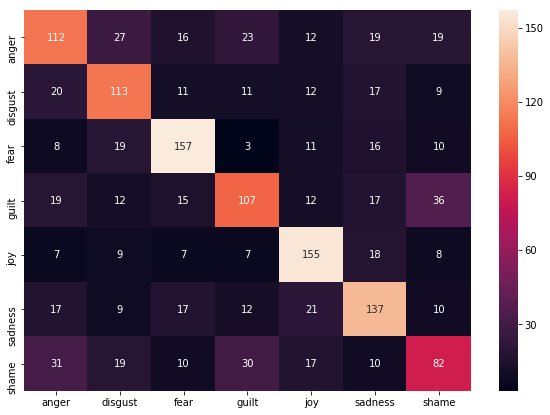

In [21]:
%matplotlib inline
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

l = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
l.sort()
df_cm = pd.DataFrame(matrix, index = l, columns = l)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")
plt.show()



In [22]:
# count for each label
label_freq = {}
for label, _ in psychExp_txt: 
    label_freq[label] = label_freq.get(label, 0) + 1

# print labels in sorted order
for l in sorted(label_freq, key=label_freq.get, reverse=True):
    print("{:10}({})  {}".format(convert_label(l, emotions), l, label_freq[l]))

joy       (1. 0. 0. 0. 0. 0. 0.)  1084
anger     (0. 0. 1. 0. 0. 0. 0.)  1080
sadness   (0. 0. 0. 1. 0. 0. 0.)  1079
fear      (0. 1. 0. 0. 0. 0. 0.)  1078
disgust   (0. 0. 0. 0. 1. 0. 0.)  1057
guilt     (0. 0. 0. 0. 0. 0. 1.)  1057
shame     (0. 0. 0. 0. 0. 1. 0.)  1045
